In [1]:
# Importing libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## 1-  Data Loading

In [2]:
# Loading Data
df = pd.read_csv("Hotel Reservations.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,date_of_arrival,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,02/10/2017,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,06/11/2018,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,28/02/2018,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,20/05/2018,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,11/04/2018,Online,0,0,0,94.50,0,Canceled


## 2-  Data Exploration

In [3]:
# Checking dtypes and nul count if found any
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   date_of_arrival                       36275 non-null  object 
 10  market_segment_type                   36275 non-null  object 
 11  repeated_guest 

In [4]:
# Converting dtypes
df["date_of_arrival"] = pd.to_datetime(df["date_of_arrival"], format="%d/%m/%Y")
df["date_of_arrival"]

0       2017-10-02
1       2018-11-06
2       2018-02-28
3       2018-05-20
4       2018-04-11
           ...    
36270   2018-08-03
36271   2018-10-17
36272   2018-07-01
36273   2018-04-21
36274   2018-12-30
Name: date_of_arrival, Length: 36275, dtype: datetime64[ns]

In [5]:
df["year"] = df["date_of_arrival"].dt.year
df["year"]

0        2017
1        2018
2        2018
3        2018
4        2018
         ... 
36270    2018
36271    2018
36272    2018
36273    2018
36274    2018
Name: year, Length: 36275, dtype: int32

In [6]:
df["month_name"] = df["date_of_arrival"].dt.month_name()
df["month_name"]

0         October
1        November
2        February
3             May
4           April
           ...   
36270      August
36271     October
36272        July
36273       April
36274    December
Name: month_name, Length: 36275, dtype: object

In [7]:
df["day_name"] = df["date_of_arrival"].dt.day_name()
df["day_name"]

0           Monday
1          Tuesday
2        Wednesday
3           Sunday
4        Wednesday
           ...    
36270       Friday
36271    Wednesday
36272       Sunday
36273     Saturday
36274       Sunday
Name: day_name, Length: 36275, dtype: object

In [8]:
df["total_guests"] = df["no_of_adults"] + df["no_of_children"]
df["total_guests"]

0        2
1        2
2        1
3        2
4        2
        ..
36270    3
36271    2
36272    2
36273    2
36274    2
Name: total_guests, Length: 36275, dtype: int64

In [9]:
df.describe().round(2)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,date_of_arrival,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,total_guests
count,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00,36275.00
mean,1.84,0.11,0.81,2.20,0.03,85.23,2018-05-24 14:33:05.433494272,0.03,0.02,0.15,103.42,0.62,2017.82,1.95
min,0.00,0.00,0.00,0.00,0.00,0.00,2017-07-01 00:00:00,0.00,0.00,0.00,0.00,0.00,2017.00,1.00
25%,2.00,0.00,0.00,1.00,0.00,17.00,2018-02-28 00:00:00,0.00,0.00,0.00,80.30,0.00,2018.00,2.00
50%,2.00,0.00,1.00,2.00,0.00,57.00,2018-06-12 00:00:00,0.00,0.00,0.00,99.45,0.00,2018.00,2.00
75%,2.00,0.00,2.00,3.00,0.00,126.00,2018-09-19 00:00:00,0.00,0.00,0.00,120.00,1.00,2018.00,2.00
max,4.00,10.00,7.00,17.00,1.00,443.00,2018-12-31 00:00:00,1.00,13.00,58.00,540.00,5.00,2018.00,12.00
std,0.52,0.40,0.87,1.41,0.17,85.93,NaN,0.16,0.37,1.75,35.09,0.79,0.38,0.65


In [10]:
# Categorical Columns
df.describe(include="O").round(2)

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status,month_name,day_name
count,36275,36275,36275,36275,36275,36275,36275
unique,36275,4,7,5,2,12,7
top,INN36275,Meal Plan 1,Room_Type 1,Online,Not_Canceled,October,Sunday
freq,1,27835,28130,23214,24390,5317,6135


## 3-  Data Cleaning

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
date_of_arrival                         0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
year                                    0
month_name                              0
day_name                                0
total_guests                            0
dtype: int64

In [13]:
catcols = df.select_dtypes(include="O")

numcols = df.select_dtypes(include=["number", "float"])

In [14]:
for cat in catcols:

    print(f"The column name is {cat}")
    print(f"which contains {df[cat].unique()} as a unique values")
    print(f"and a number of {df[cat].nunique()} uniques")
    print("_" * 50)

The column name is Booking_ID
which contains ['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275'] as a unique values
and a number of 36275 uniques
__________________________________________________
The column name is type_of_meal_plan
which contains ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3'] as a unique values
and a number of 4 uniques
__________________________________________________
The column name is room_type_reserved
which contains ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3'] as a unique values
and a number of 7 uniques
__________________________________________________
The column name is market_segment_type
which contains ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary'] as a unique values
and a number of 5 uniques
__________________________________________________
The column name is booking_status
which contains ['Not_Canceled' 'Canceled'] as a unique values
and a number of 2 un

In [15]:
for num in numcols:
    px.histogram(data_frame=df, x=num).show()

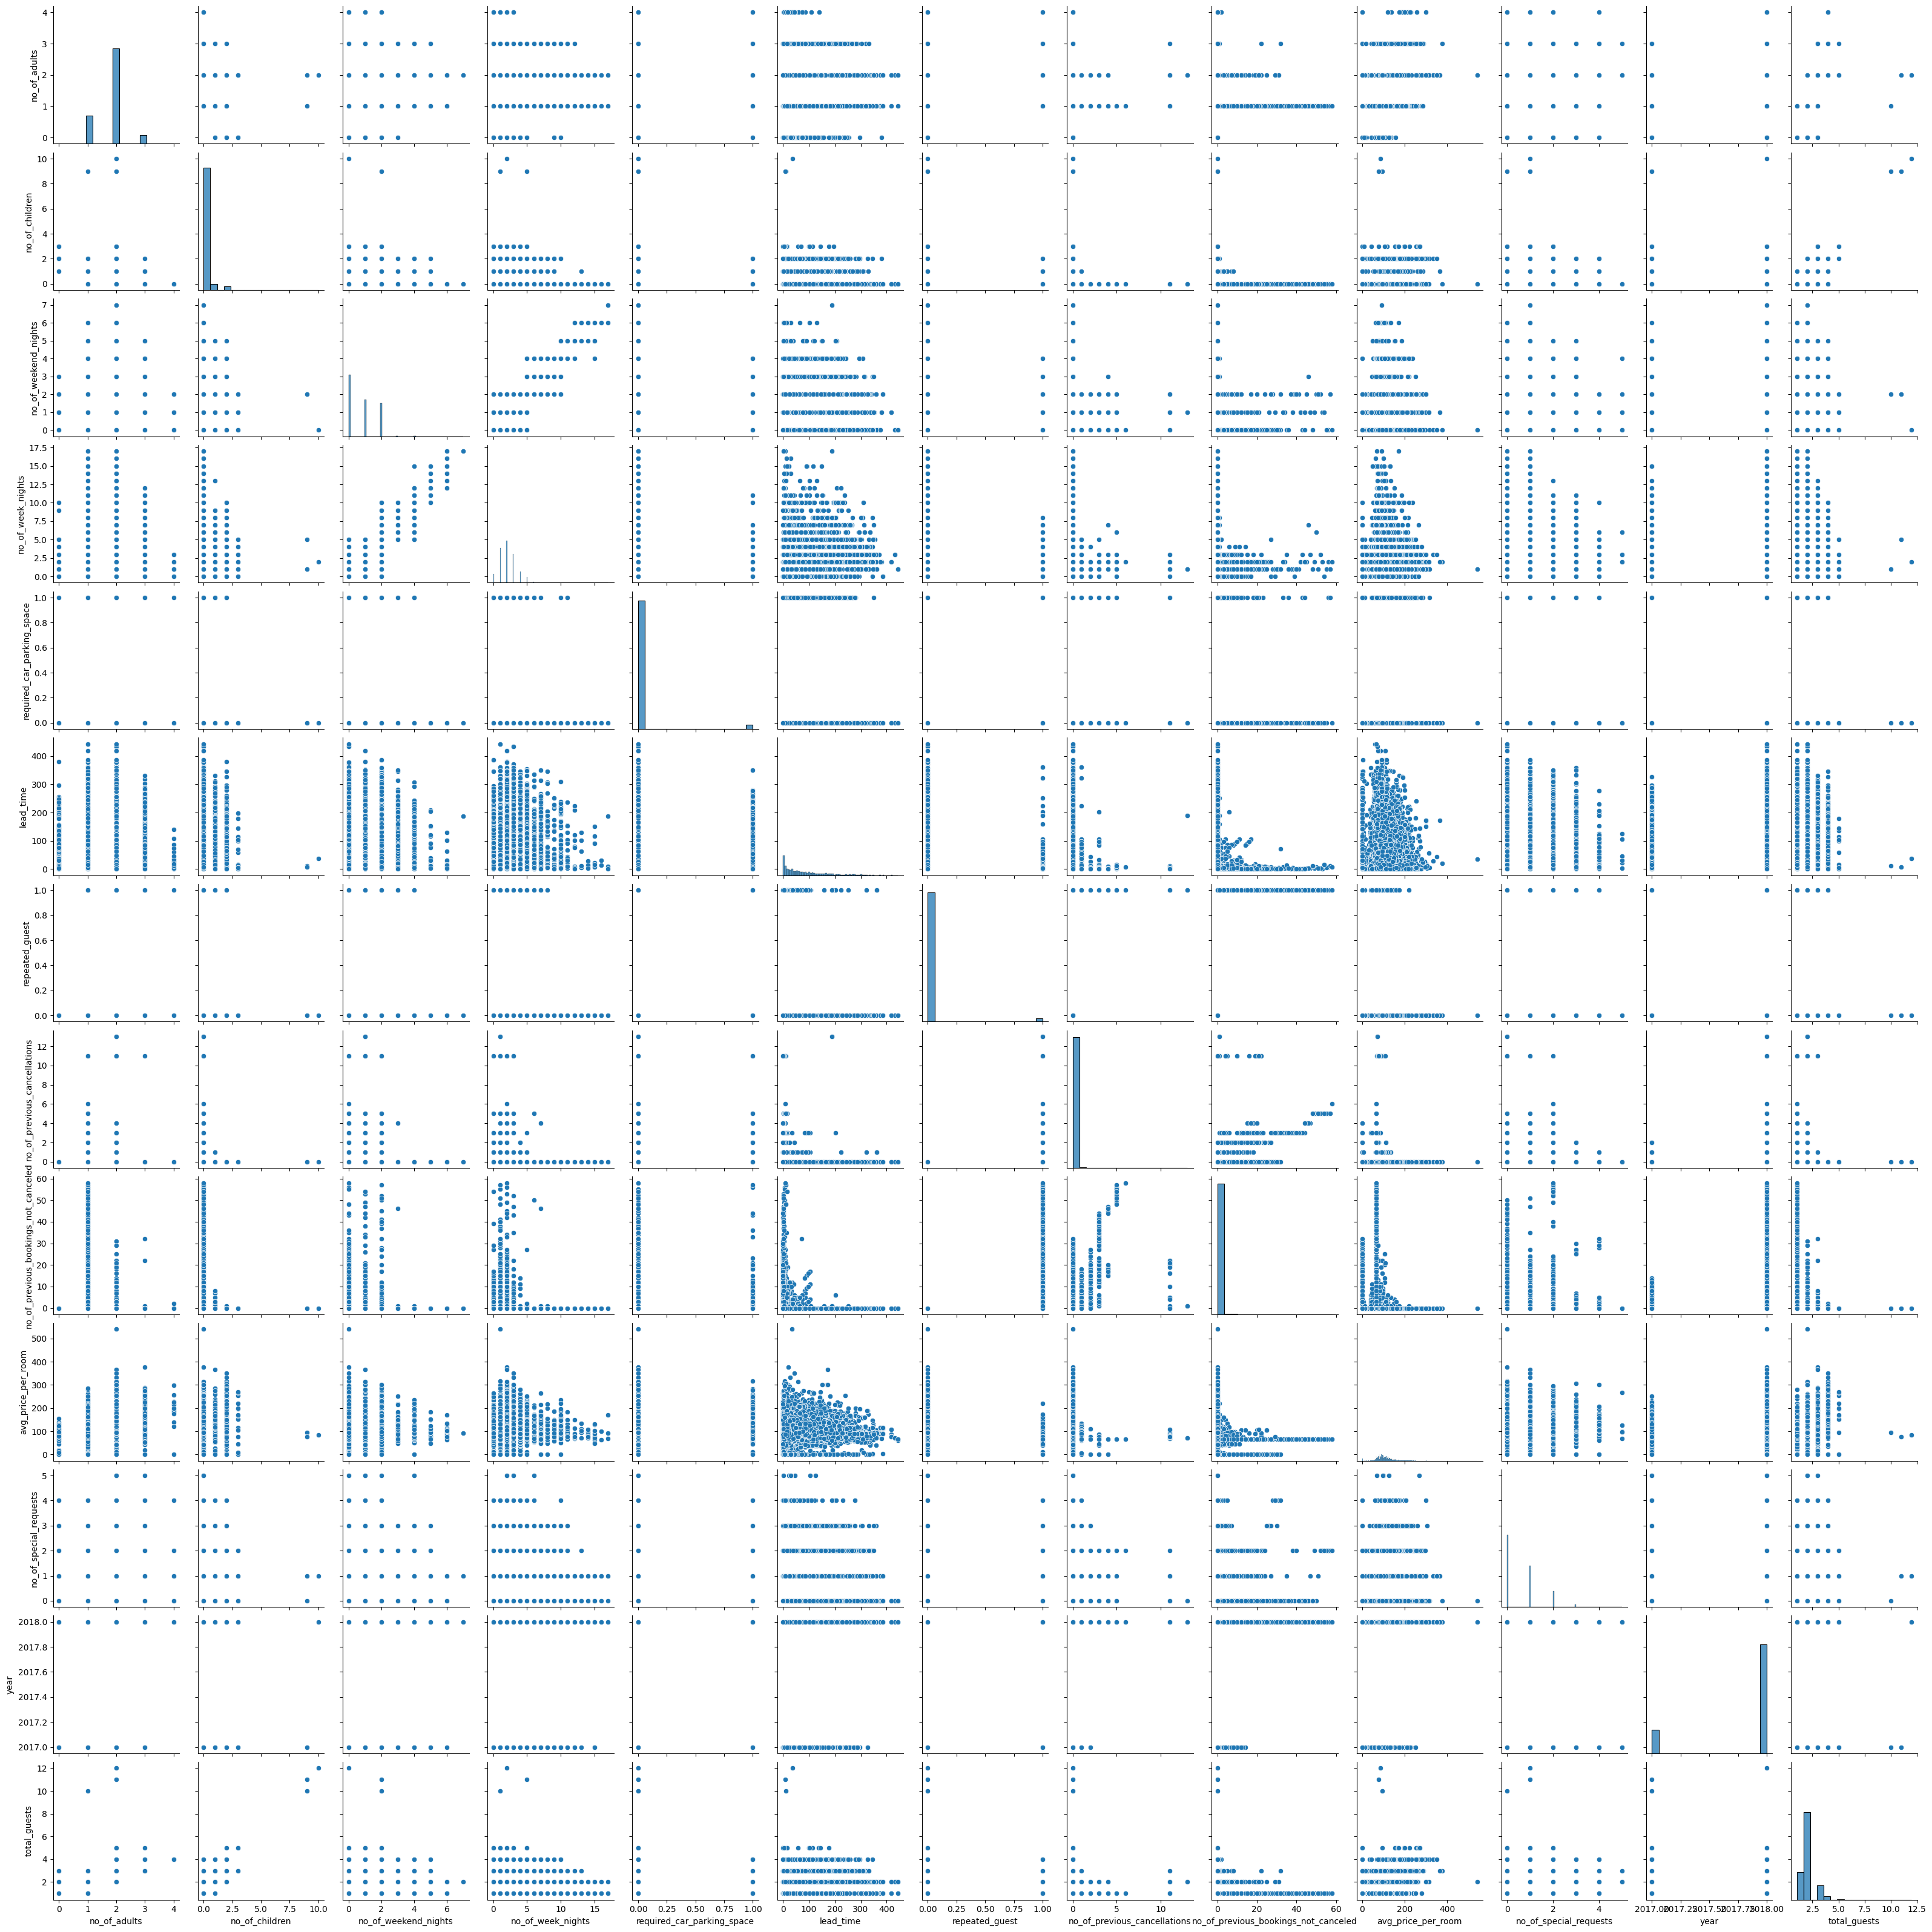

In [16]:
sns.pairplot(df)

## 4- Data Analysis & Visualization

In [17]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'date_of_arrival',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'year', 'month_name',
       'day_name', 'total_guests'],
      dtype='object')

In [18]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,date_of_arrival,...,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,year,month_name,day_name,total_guests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017-10-02,...,0,0,0,65.00,0,Not_Canceled,2017,October,Monday,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018-11-06,...,0,0,0,106.68,1,Not_Canceled,2018,November,Tuesday,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018-02-28,...,0,0,0,60.00,0,Canceled,2018,February,Wednesday,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018-05-20,...,0,0,0,100.00,0,Canceled,2018,May,Sunday,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018-04-11,...,0,0,0,94.50,0,Canceled,2018,April,Wednesday,2


1) Which meal plan is most preferred by Adults?

In [19]:
meals_a = df.groupby("type_of_meal_plan")[["no_of_adults", "no_of_children"]].sum().sort_values(by="type_of_meal_plan" ,ascending=False).reset_index()
meals_a

,type_of_meal_plan,no_of_adults,no_of_children
0,Not Selected,9600,134
1,Meal Plan 3,10,0
2,Meal Plan 2,6194,239
3,Meal Plan 1,51122,3446


In [20]:
px.bar(data_frame=meals_a, x="type_of_meal_plan", y=["no_of_adults", "no_of_children"], title="Preferred Meal by Both Adults and Children")

2) Which room is preferred to the adults?

In [21]:
adults = df.groupby("room_type_reserved")["no_of_adults"].sum().reset_index()
adults

,room_type_reserved,no_of_adults
0,Room_Type 1,49799
1,Room_Type 2,1093
2,Room_Type 3,11
3,Room_Type 4,13280
4,Room_Type 5,461
5,Room_Type 6,1927
6,Room_Type 7,355


In [22]:
px.histogram(data_frame=adults, y='no_of_adults', x='room_type_reserved', title='Preferred Room to Adults')

3) Usually how many nights the guests spend?

In [23]:
nights_spent = df.groupby("no_of_week_nights")["no_of_adults"].sum().sort_values(ascending=False).reset_index()
nights_spent

,no_of_week_nights,no_of_adults
0,2,21126
1,1,16769
2,3,14882
3,4,5851
4,0,4147
5,5,3218
6,6,371
7,7,204
8,8,119
9,10,100


In [24]:
px.histogram(data_frame=nights_spent, x='no_of_week_nights', y='no_of_adults', title='Spent Week Day Nights')

4) Which Room Type has highest average price to guests?

In [25]:
rooms = df.groupby("room_type_reserved")["avg_price_per_room"].mean().sort_values(ascending=False).reset_index().round(2)
rooms

,room_type_reserved,avg_price_per_room
0,Room_Type 6,182.21
1,Room_Type 7,155.20
2,Room_Type 4,125.29
3,Room_Type 5,123.73
4,Room_Type 1,95.92
5,Room_Type 2,87.85
6,Room_Type 3,73.68


In [26]:
px.bar(data_frame=rooms, y='avg_price_per_room', x='room_type_reserved', title='Room Type Price AVG')

5) Which day of the week do the guests prefer to arrive in?

In [27]:
days = df.groupby("day_name", observed=False)["no_of_adults"].sum().reset_index().sort_values(by="day_name")
days

,day_name,no_of_adults
0,Friday,8471
1,Monday,10137
2,Saturday,10078
3,Sunday,11601
4,Thursday,8035
5,Tuesday,9303
6,Wednesday,9301


In [68]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
px.line(data_frame=days, x="day_name", y="no_of_adults", title="Most Day preferred to customers", 
category_orders= day_order)

6) Which month of the year do the guests prefer to arrive in?

In [29]:
month = df.groupby("month_name")["no_of_adults"].sum().reset_index().sort_values(by="no_of_adults" ,ascending=False)
month

,month_name,no_of_adults
10,October,9504
11,September,8493
1,August,7651
5,July,5791
2,December,5729
6,June,5663
0,April,5178
9,November,5164
8,May,4782
7,March,4488


In [30]:
px.histogram(data_frame=month, x='month_name', y='no_of_adults', title='Most month preferred to customers')

7) What is the difference between Special Requests and time taken to be resolved by a Repeated Guest?

In [31]:
px.scatter(data_frame=df,
           x='no_of_special_requests', y='lead_time', color='repeated_guest', title='Special Requests vs. Lead Time(min)')

8) What is the average price per room for the guests who have children?

In [32]:
avg_w_children = df.groupby(["no_of_children"])["avg_price_per_room"].mean().reset_index().round(2)
avg_w_children

,no_of_children,avg_price_per_room
0,0,100.40
1,1,122.33
2,2,169.63
3,3,154.59
4,9,85.75
5,10,84.45


In [33]:
px.scatter(data_frame=avg_w_children, x='avg_price_per_room', y='no_of_children', size='avg_price_per_room', title='AVG Price to Guests who own children')

9) What is the average room price based on the market segment type?

In [34]:
avg_price_market = df.groupby("market_segment_type")["avg_price_per_room"].mean().round(2).reset_index()
avg_price_market

,market_segment_type,avg_price_per_room
0,Aviation,100.70
1,Complementary,3.14
2,Corporate,82.91
3,Offline,91.63
4,Online,112.26


In [35]:
px.pie(data_frame=avg_price_market, names='market_segment_type', values='avg_price_per_room', title='Hotel Rooms AVG Prices by Market Segments')

10) Which room is preferred to the guests who own children?

In [36]:
preferred_room = df.groupby("room_type_reserved")["total_guests"].sum().sort_values(ascending=False).reset_index()
preferred_room

,room_type_reserved,total_guests
0,Room_Type 1,51188
1,Room_Type 4,13511
2,Room_Type 6,3558
3,Room_Type 2,1500
4,Room_Type 5,496
5,Room_Type 7,481
6,Room_Type 3,11


In [37]:
px.bar(data_frame=preferred_room, y= 'room_type_reserved', x='total_guests', color='total_guests', title='Preferred Room to Families')

11) How many guests cancelled?

In [38]:
cancellation = df.groupby("booking_status")["total_guests"].sum().reset_index()
cancellation

,booking_status,total_guests
0,Canceled,24173
1,Not_Canceled,46572


In [39]:
px.pie(data_frame=cancellation, names="booking_status", values="total_guests", title="Cancellation of Reservations")

12) What is the difference between Week Nights and Weekend Nights by the number of guests?

In [40]:
px.scatter(data_frame=df, x='no_of_week_nights',
           y='no_of_weekend_nights', size='no_of_adults', color='market_segment_type', title="Week Nights vs. Weekend Nights (Size by number of guests)")

13) Is there a correlation between the numeric columns?

In [41]:
corrdf = df.corr(numeric_only=True).round(2)
corrdf

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,year,total_guests
no_of_adults,1.00,-0.02,0.10,0.11,0.01,0.10,-0.19,-0.05,-0.12,0.30,0.19,0.08,0.79
no_of_children,-0.02,1.00,0.03,0.02,0.03,-0.05,-0.04,-0.02,-0.02,0.34,0.12,0.05,0.60
no_of_weekend_nights,0.10,0.03,1.00,0.18,-0.03,0.05,-0.07,-0.02,-0.03,-0.00,0.06,0.06,0.10
no_of_week_nights,0.11,0.02,0.18,1.00,-0.05,0.15,-0.10,-0.03,-0.05,0.02,0.05,0.03,0.10
required_car_parking_space,0.01,0.03,-0.03,-0.05,1.00,-0.07,0.11,0.03,0.06,0.06,0.09,0.02,0.03
lead_time,0.10,-0.05,0.05,0.15,-0.07,1.00,-0.14,-0.05,-0.08,-0.06,-0.10,0.14,0.05
repeated_guest,-0.19,-0.04,-0.07,-0.10,0.11,-0.14,1.00,0.39,0.54,-0.17,-0.01,-0.02,-0.18
no_of_previous_cancellations,-0.05,-0.02,-0.02,-0.03,0.03,-0.05,0.39,1.00,0.47,-0.06,-0.00,0.00,-0.05
no_of_previous_bookings_not_canceled,-0.12,-0.02,-0.03,-0.05,0.06,-0.08,0.54,0.47,1.00,-0.11,0.03,0.03,-0.11
avg_price_per_room,0.30,0.34,-0.00,0.02,0.06,-0.06,-0.17,-0.06,-0.11,1.00,0.18,0.18,0.45


In [42]:
px.imshow(corrdf, height=600, width=1200, text_auto=True, title="Correlation between Numeric Columns")

In [43]:
# Saving cleaned df into a new csv file
df.to_csv("cleaned_hotel_reservations.csv", index=False)

## Deployment

In [77]:
%%writefile hotel.py

import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(page_title="Hotel Reservations Deployment 🛎🏨🛌", page_icon="🏨")

st.header("Hotel Reservation Analysis Deployment")

st.image("pexels-pixabay-261102.jpg", caption="Hotel Reservation Deployment")

df = pd.read_csv("cleaned_hotel_reservations.csv")
st.dataframe(df.head())

page = st.sidebar.radio('Pages', ['Univariate Analysis', "Bivariate Analysis", "Multivariate Analysis"])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']



if page == "Univariate Analysis":
    type = st.selectbox("Select Chart Type", ["Histogram","Pie"])

    if type == "Histogram":
        st.plotly_chart(px.histogram(data_frame=df.groupby("no_of_week_nights")["no_of_adults"].sum().sort_values(ascending=False).reset_index(),
        x='no_of_week_nights', y='no_of_adults', title='Spent Week Day Nights'))

        st.plotly_chart(px.histogram(data_frame=df.groupby("month_name")["no_of_adults"].sum().reset_index().sort_values(by="no_of_adults",
        ascending=False)
        , x='month_name', 
        y='no_of_adults', title='Most month preferred to customers'))

        st.plotly_chart(px.histogram(data_frame= df.groupby("room_type_reserved")["no_of_adults"].sum().reset_index(),
        y='no_of_adults', x='room_type_reserved', title='Preferred Room to Adults'))

    else:
        st.plotly_chart(px.pie(data_frame=df.groupby("type_of_meal_plan")["no_of_adults"].sum().sort_values(ascending=False).reset_index(),
        names="type_of_meal_plan", values="no_of_adults", title="Preferred Meal by Adults"))

        st.plotly_chart(px.pie(data_frame= df.groupby("booking_status")["total_guests"].sum().reset_index(),
        names="booking_status", values="total_guests", title="Cancellation of Reservations"))

        st.plotly_chart(px.pie(data_frame= df.groupby("market_segment_type")["avg_price_per_room"].mean().round(2).reset_index(), 
        names='market_segment_type', values='avg_price_per_room', title='Hotel Rooms AVG Prices by Market Segments'))

elif page == "Bivariate Analysis":
    type = st.selectbox("Select Chart Type", ["Bar","Line"])

    if type == "Bar":

        st.plotly_chart(px.bar(data_frame=df.groupby("type_of_meal_plan")[["no_of_adults", "no_of_children"]].sum().sort_values(by="type_of_meal_plan" 
        ,ascending=False).reset_index(), x="type_of_meal_plan", 
        y=["no_of_adults", "no_of_children"], title="Preferred Meal by Both Adults and Children"))

        st.plotly_chart(px.bar(data_frame= df.groupby("room_type_reserved")["avg_price_per_room"].mean().sort_values(ascending=False).reset_index().round(2), 
        y='avg_price_per_room', x='room_type_reserved', title='Room Type Price AVG'))

        st.plotly_chart(px.bar(data_frame= df.groupby("room_type_reserved")["total_guests"].sum().sort_values(ascending=False).reset_index(), 
        y= 'room_type_reserved', x='total_guests', color='total_guests', title='Preferred Room to Families'))

    elif type == "Line":
        st.plotly_chart(px.line(data_frame=df.groupby("day_name")["no_of_adults"].sum().reset_index().sort_values(by="day_name"), 
        x="day_name", y="no_of_adults", title="Most Day preferred to customers", category_orders= day_order))



elif page == "Multivariate Analysis":
    type = st.selectbox("Select Chart Type", ["Scatter Plot", "Heatmap"])

    if type == "Scatter Plot":
        st.plotly_chart(px.scatter(data_frame=df,
           x='no_of_special_requests', y='lead_time', color='repeated_guest', title='Special Requests vs. Lead Time(min)'))

        st.plotly_chart(px.scatter(data_frame= df.groupby(["no_of_children"])["avg_price_per_room"].mean().reset_index().round(2), 
        x='avg_price_per_room', y='no_of_children', 
        size='avg_price_per_room', title='AVG Price to Guests who own children'))

        st.plotly_chart(px.scatter(data_frame=df, x='no_of_week_nights',
        y='no_of_weekend_nights', size='no_of_adults', color='market_segment_type',
        title="Week Nights vs. Weekend Nights (Size by number of guests)"))

    elif type == "Heatmap":
        st.plotly_chart(px.imshow(df.corr(numeric_only=True).round(2), height=1200, width=2400, text_auto=True, title="Correlation between Numeric Columns"))

Overwriting hotel.py


### Deployment Link
https://hotel-reservation-ielmdzd3tqzsjll4md3qjj.streamlit.app/

In [ ]:
# Checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

# Data Preprocessing

In [ ]:
# Dropping Unnecessary Columns
df.drop(["Booking_ID"], axis=1, inplace=True)

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,date_of_arrival,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,year,month_name,day_name,total_guests
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017-10-02,Offline,0,0,0,65.00,0,Not_Canceled,2017,October,Monday,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018-11-06,Online,0,0,0,106.68,1,Not_Canceled,2018,November,Tuesday,2
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018-02-28,Online,0,0,0,60.00,0,Canceled,2018,February,Wednesday,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018-05-20,Online,0,0,0,100.00,0,Canceled,2018,May,Sunday,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018-04-11,Online,0,0,0,94.50,0,Canceled,2018,April,Wednesday,2


### 1- Split Data into Input features and Target feature

In [ ]:
x = df.drop("booking_status", axis=1)
y = df["booking_status"]

### 2- Split Data into Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_test.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
date_of_arrival                         0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
year                                    0
month_name                              0
day_name                                0
total_guests                            0
dtype: int64

In [ ]:
x_train.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
date_of_arrival                         0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
year                                    0
month_name                              0
day_name                                0
total_guests                            0
dtype: int64

### As we noticed, there's no missing data so we'll skip the imputation part

## Categorical

- Nominal

In [ ]:
x_train.select_dtypes(include="O").columns.drop(["date_of_arrival", "month_name"])

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'day_name'],
      dtype='object')

In [ ]:
for col in x_train.select_dtypes(include="O").columns.drop(["date_of_arrival", "month_name"]):
    print(col)
    print(x_train[col].nunique())

type_of_meal_plan
4
room_type_reserved
7
market_segment_type
5
day_name
7


In [ ]:
# Using One Hot Encoder
ohe_cols = x_train.select_dtypes(include="O").columns.drop(["date_of_arrival", "month_name"])
ohe_cols

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'day_name'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, drop='first')

ohe_train = ohe.fit_transform(x_train[ohe_cols])
ohe_test = ohe.fit_transform(x_test[ohe_cols])

In [ ]:
ohe.get_feature_names_out()

array(['type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Meal Plan 3',
       'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7',
       'market_segment_type_Complementary',
       'market_segment_type_Corporate', 'market_segment_type_Offline',
       'market_segment_type_Online', 'day_name_Monday',
       'day_name_Saturday', 'day_name_Sunday', 'day_name_Thursday',
       'day_name_Tuesday', 'day_name_Wednesday'], dtype=object)

In [ ]:
ohe_train_df = pd.DataFrame(ohe_train, columns=ohe.get_feature_names_out())

ohe_test_df = pd.DataFrame(ohe_test, columns=ohe.get_feature_names_out())

In [ ]:
ohe_train_df

,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29016,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
x_train.reset_index(inplace=True, drop=True)
x_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

In [ ]:
x_train = pd.concat([x_train, ohe_train_df], axis=1).drop(ohe_cols, axis=1)
x_test = pd.concat([x_test, ohe_test_df], axis=1).drop(ohe_cols, axis=1)

In [ ]:
x_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,date_of_arrival,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,2,1,2,1,0,26,2017-10-17,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,1,1,1,0,98,2018-07-16,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,0,0,3,0,433,2018-09-08,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2,0,2,5,0,195,2018-08-08,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,2,0,188,2018-06-15,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29015,2,0,2,2,0,43,2017-12-26,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29016,1,0,0,2,0,102,2017-10-16,0,0,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
29017,2,0,0,2,0,5,2018-05-24,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29018,2,0,0,3,0,213,2018-06-07,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
BE_cols = x_train.select_dtypes(include="O").columns.drop(["date_of_arrival"])
BE_cols

Index(['month_name'], dtype='object')

In [ ]:
from category_encoders import BinaryEncoder

BE = BinaryEncoder()

BE_train_df = BE.fit_transform(x_train[BE_cols])

BE_test_df = BE.fit_transform(x_test[BE_cols])

In [ ]:
x_train = pd.concat([x_train, BE_train_df], axis=1).drop(BE_cols, axis=1)

x_test = pd.concat([x_test, BE_test_df], axis=1).drop(BE_cols, axis=1)

In [ ]:
y_train.value_counts()

booking_status
Not_Canceled    19551
Canceled         9469
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

booking_status
Not_Canceled    4839
Canceled        2416
Name: count, dtype: int64